# 1.	Kaplan Meier Manipulation 
a.	Please see the attached csv file (Aneja_Coding_Excercise_KM.csv) which includes patient level survival data to construct a Kaplan Meier curve. Under the Explanations tab you will see descriptions for data in each column. 


In [8]:
import pandas as pd
import numpy as np

In [9]:
%pip install lifelines
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

     |████████████████████████████████| 348 kB 7.5 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=00422cb4fb0430bc514adf4ddd9500427d189bc5c6925cffb6883ea8c404dce2
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


b.	Please load the CSV into python and plot a Kaplan Meier curve for the patients separated by group. Please be sure to include confidence intervals on the survival curves. 

In [14]:
df1 = pd.read_csv("Aneja_Coding_Excercise_KM.csv")

In [15]:
# Call fitter and fit with time and event data for group miR-137 (case)
kmf_case = KaplanMeierFitter()
kmf_case.fit(df1[df1.Group == "miR-137"].Time,df1[df1.Group == "miR-137"].Event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 34 total observations, 0 right-censored observations>

Text(0.5, 1.0, 'Kaplan Meier Curve for Cases with CI')

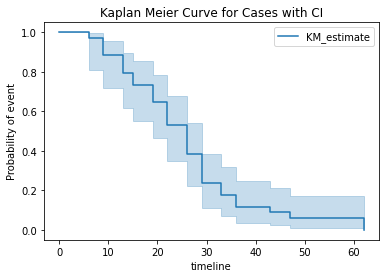

In [16]:
# Create survival function for group miR-137, plot visualisations
kmf_case.survival_function_
kmf_case.plot_survival_function()
plt.xlabel("timeline")
plt.ylabel("Probability of event")
plt.title("Kaplan Meier Curve for Cases with CI")

In [17]:
# Call fitter and fit with time and event data for control group
kmf_control = KaplanMeierFitter()
kmf_control.fit(df1[df1.Group == "control"].Time,df1[df1.Group == "control"].Event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 129 total observations, 7 right-censored observations>

Text(0.5, 1.0, 'Kaplan Meier Curve for Controls with CI')

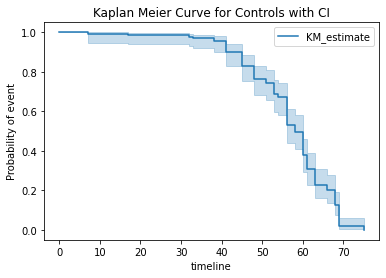

In [18]:
# Create survival function for  control group, plot visualisations
kmf_control.survival_function_
kmf_control.plot_survival_function()
plt.xlabel("timeline")
plt.ylabel("Probability of event")
plt.title("Kaplan Meier Curve for Controls with CI")

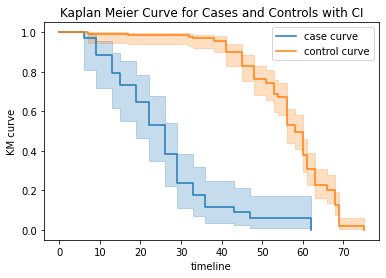

In [19]:
# put two curves together
kmf_case.plot_survival_function()
kmf_control.plot_survival_function()
plt.ylabel("KM curve")
plt.legend(["case curve","control curve"])
plt.title("Kaplan Meier Curve for Cases and Controls with CI")
plt.savefig('Aneja_KM_Curves.png')

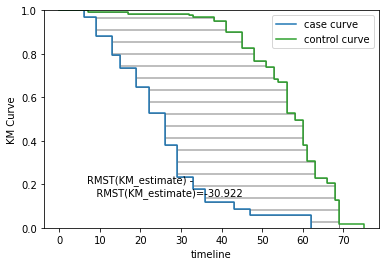

In [20]:
# Alternative way to generate the plot (did not figure out how to include CI)
from lifelines.plotting import rmst_plot

rmst_plot(kmf_case,kmf_control)
plt.ylabel("KM Curve")
plt.legend(["case curve","control curve"])

c.	Please perform a log-rank test to assess statistical significance between the groups. 


In [21]:
# import logrank_test fro  library lifelines
from lifelines.statistics import logrank_test

H_o: Cases and Controls have same Kaplan Meier curve

H_a: Cases and Controls have different Kaplan Meier curves

In [22]:
lrt = logrank_test(df1[df1.Group == "miR-137"].Time,df1[df1.Group == "control"].Time,df1[df1.Group == "miR-137"].Event,df1[df1.Group == "control"].Event)
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         122.25 <0.005     91.99

Since we obtained a p value which is smaller than 0.005, we reject our null hypothese and conclude that controls and cases have different Kaplan Meier curves

In [23]:
df1.Predicted.quantile([0.25,0.5,0.75])

0.25    17.5
0.50    33.0
0.75    49.0
Name: Predicted, dtype: float64

In [24]:
df_q1 = df1[df1.Predicted < 17.5]
df_q2 = df1[(df1.Predicted < 33) & (df1.Predicted > 17.5)]
df_q3 = df1[(df1.Predicted < 49) & (df1.Predicted >= 33)]
df_q4 = df1[df1.Predicted >= 49]

In [27]:
df_q1['ql'] = 1
df_q2['ql'] = 2
df_q3['ql'] = 3
df_q4['ql'] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

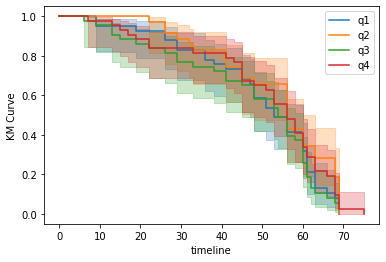

In [28]:
kmf_q1 = KaplanMeierFitter()
kmf_q1.fit(df_q1.Time,df_q1.Event)
kmf_q2 = KaplanMeierFitter()
kmf_q2.fit(df_q2.Time,df_q2.Event)
kmf_q3 = KaplanMeierFitter()
kmf_q3.fit(df_q3.Time,df_q3.Event)
kmf_q4 = KaplanMeierFitter()
kmf_q4.fit(df_q4.Time,df_q4.Event)
kmf_q1.plot_survival_function()
kmf_q2.plot_survival_function()
kmf_q3.plot_survival_function()
kmf_q4.plot_survival_function()
plt.ylabel("KM Curve")
plt.legend(["q1","q2","q3","q4"])
plt.savefig('Aneja_KM_Curves_2.png')

In [29]:
from lifelines.statistics import multivariate_logrank_test

H_o: all four quartiles have the same KM curve

H_a: at least one of the four quartiles differs from the other

In [30]:
frames = [df_q1,df_q2,df_q3,df_q4]
df1_withq = pd.concat(frames)
mlt = multivariate_logrank_test(df1_withq['Time'], df1_withq['ql'], df1_withq['Event'])
mlt.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           3.37 0.34      1.57

We obtained a p value of 0.34, which is greater than 0.05, so we fail to reject our null hypothese and conclude that all four quartiles have the same KM curves.

# 2.	MNIST CNN
a.	Please download the mnist dataset using keras (https://keras.io/api/datasets/mnist/#load_data-function)


In [1]:
import tensorflow as tf
from tensorflow import keras

# import the mnist dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print("Train info",train_images.shape, train_labels.shape)
print("Test info",test_images.shape, test_labels.shape)
train_images = train_images.reshape((train_images.shape[0],28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((test_images.shape[0],28*28))
test_images = test_images.astype('float32')/255

from tensorflow.  keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

Train info (60000, 28, 28) (60000,)
Test info (10000, 28, 28) (10000,)


b.	Please construct a 2D convolutional neural network with the following architecture
i.	Input shape (28,28,1)
ii.	Convolutional layer size, 32 filters, kernel size (3,3)
iii.	Max Pooling layer (pool size 2,2)
iv.	Convolution layer size, 64 filters, kernel size (2,2)
v.	Flatten layer
vi.	Dense layer size 20
vii.	Output based on the number of classes
c.	Please train the network for 5 epochs with a learning rate of 0.001.
d.	Please choose the appropriate optimizer and loss function for such a classification problem



In [36]:
#
# Make sure the shape of the input is correct
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))
#
cnn_network = keras.models.Sequential()
#
# First convolutional layer
cnn_network.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
# Pool
cnn_network.add(keras.layers.MaxPooling2D((2,2)))
#
# Second convolutional layer
cnn_network.add(keras.layers.Conv2D(64,(2,2),activation='relu'))
#
# Connect to a dense output layer
cnn_network.add(keras.layers.Flatten())
cnn_network.add(keras.layers.Dense(20,activation='relu'))
cnn_network.add(keras.layers.Dense(10,activation='softmax'))
#
# Compile
opt = keras.optimizers.Adam(learning_rate=0.001)
METRICS = ['accuracy',keras.metrics.AUC(name='auc')]
cnn_network.compile(optimizer=opt,loss='categorical_crossentropy',metrics=METRICS)
#
# Fit/save/print summary
history = cnn_network.fit(train_images,train_labels_cat,epochs=5,validation_data=(test_images,test_labels_cat))

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1708 - accuracy: 0.9477 - auc: 0.9973 - val_loss: 0.0567 - val_accuracy: 0.9810 - val_auc: 0.9992
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0568 - accuracy: 0.9832 - auc: 0.9992 - val_loss: 0.0486 - val_accuracy: 0.9836 - val_auc: 0.9996
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0382 - accuracy: 0.9883 - auc: 0.9995 - val_loss: 0.0405 - val_accuracy: 0.9869 - val_auc: 0.9996
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0283 - accuracy: 0.9913 - auc: 0.9997 - val_loss: 0.0385 - val_accuracy: 0.9887 - val_auc: 0.9991
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0226 - accuracy: 0.9925 - auc: 0.9998 - val_loss: 0.0459 - val_accuracy: 0.9868 - val_auc: 0.9989


In [37]:
print(cnn_network.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                184340    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 193,126
Trainable params: 193,126
Non-trainable params: 0
________________________________________________

e.	Please plot the training and validation loss curves and save as png titled “Aneja_TV.png”

f.	Please print the accuracy and AUC of the final trained model.

In [42]:
test_loss, test_acc,test_auc = cnn_network.evaluate(test_images,test_labels_cat)
print("CNN: Test sample loss: ",test_loss, "; Test sample accuracy:",test_acc,"; AUC: ",test_auc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0459 - accuracy: 0.9868 - auc: 0.9989
CNN: Test sample loss:  0.04585881531238556 ; Test sample accuracy: 0.9868000149726868 ; AUC:  0.9989162087440491


In [39]:
import plotly.express as px

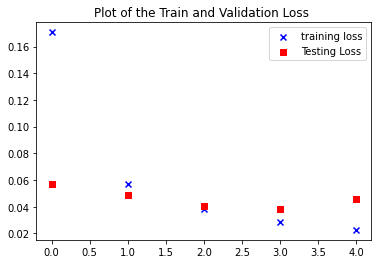

<Figure size 432x288 with 0 Axes>

In [43]:
plt.scatter(np.array(range(0,len(history.history['loss']))),history.history['loss'], c='b', marker='x', label='1')
plt.scatter(np.array(range(0,len(history.history['loss']))),history.history['val_loss'], c='r', marker='s', label='-1')
plt.legend(["training loss","Testing Loss"])
plt.title('Plot of the Train and Validation Loss ')
plt.show()
plt.savefig('Aneja_TV.png')